# Estymatory największej wiarygodności

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Przykład 
Program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [5]:
# Parametry rozkładu jednostajnego
a, b = -2, 4  # zakładamy, że chcemy losować z przedziału [-2, 4]

# Parametry rozkładu normalnego
mu, sigma = 1, 1

# Liczba próbek
N = 10000

# Losowanie próbki z rozkładu jednostajnego
uniform_data = np.random.uniform(a, b, N)

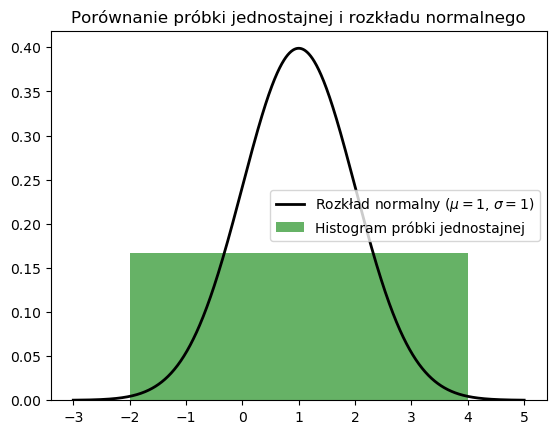

In [6]:
# Punkty, dla których będziemy rysować funkcję gęstości rozkładu normalnego
t = np.linspace(-3, 5, 1000)

# Rysowanie histogramu próbki z rozkładu jednostajnego
plt.hist(uniform_data, bins=1, density=True, alpha=0.6, color='g', label='Histogram próbki jednostajnej')

# Rysowanie funkcji gęstości rozkładu normalnego
plt.plot(t, stats.norm.pdf(t, mu, sigma), 'k-', lw=2, label='Rozkład normalny ($\mu=1$, $\sigma=1$)')

# Dodanie legendy i tytułu
plt.legend()
plt.title('Porównanie próbki jednostajnej i rozkładu normalnego')
plt.show()

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma^2=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

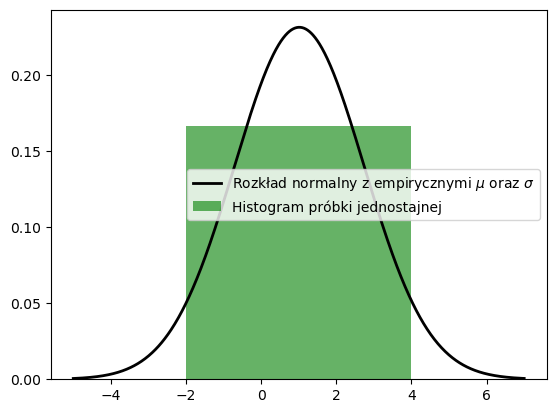

In [7]:
uniform_data = np.random.uniform(a, b, N)
mean = np.mean(uniform_data)
sigma = np.std(uniform_data)
t = np.linspace(-5, 7, 1000)

plt.hist(uniform_data, bins=1, density=True, alpha=0.6, color='g', label='Histogram próbki jednostajnej')
plt.plot(t, stats.norm.pdf(t, mean, sigma), 'k-', lw=2, label = 'Rozkład normalny z empirycznymi $\mu$ oraz $\sigma$')
plt.legend()
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

0.9806826093195748 1.7343133362567131


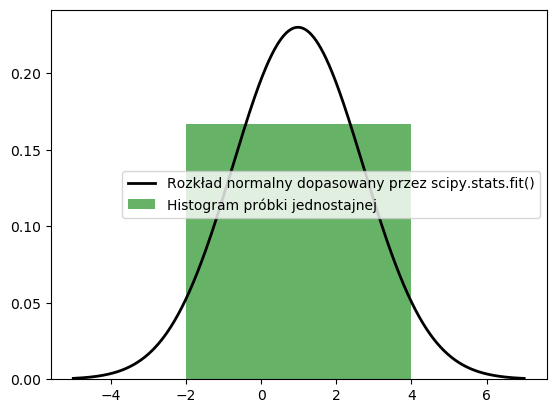

In [8]:
uniform_data = np.random.uniform(a, b, N)
t = np.linspace(-5, 7, 1000)
mean, sigma = stats.norm.fit(uniform_data)
print(mean, sigma)

plt.hist(uniform_data, bins=1, density=True, alpha=0.6, color='g', label='Histogram próbki jednostajnej')
plt.plot(t, stats.norm.pdf(t, mean, sigma), 'k-', lw=2, label = 'Rozkład normalny dopasowany przez scipy.stats.fit()')
plt.legend()
plt.show()

# Zadanie 3

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [9]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1 / (sigma * (2 * np.pi) ** 0.5) * np.e ** (-(x - mu) ** 2 / (2 * sigma**2))

In [10]:
def log_Gpdf(X, mu, sigma):
    return np.sum(np.log(Gpdf(X, mu, sigma)))


# Zadanie 4
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [11]:
print(log_Gpdf(uniform_data, mu = 0, sigma = 1))
print(log_Gpdf(uniform_data, mu = 0, sigma = 2))
print(log_Gpdf(uniform_data, mu = 1, sigma = 1))
print(log_Gpdf(uniform_data, mu = 0.5, sigma = 0.2))
print(log_Gpdf(uniform_data, mu = 1, sigma = 1.7))

-29037.290974745432
-21082.833548320858
-24230.464881549684
-397957.32111022645
-19700.193638344193


# Przykład
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [12]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3
[-1.00000001e+00 -7.45058060e-09]


# Zadanie 5
Zminimalizuj funkcję wiarygodności korzystając z optimize (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

In [33]:
def unif_log_Gpdf(x):
    mu, sigma = x
    return -1 * log_Gpdf(uniform_data, mu, sigma)
x0 = np.asarray((1, 1))
res2 = optimize.fmin_cg(unif_log_Gpdf, x0)

C:\Users\rafal\AppData\Local\Temp\ipykernel_3740\3681204985.py:2: RuntimeWarning: invalid value encountered in log
  return np.sum(np.log(Gpdf(X, mu, sigma)))


         Current function value: nan
         Iterations: 3
         Function evaluations: 348
         Gradient evaluations: 116


C:\Users\rafal\AppData\Local\Temp\ipykernel_3740\3681204985.py:2: RuntimeWarning: invalid value encountered in log
  return np.sum(np.log(Gpdf(X, mu, sigma)))
C:\Users\rafal\AppData\Local\Temp\ipykernel_3740\3681204985.py:2: RuntimeWarning: invalid value encountered in log
  return np.sum(np.log(Gpdf(X, mu, sigma)))


In [129]:
res2

array([1.01105168, 1.73398933])

# Zadanie 6
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

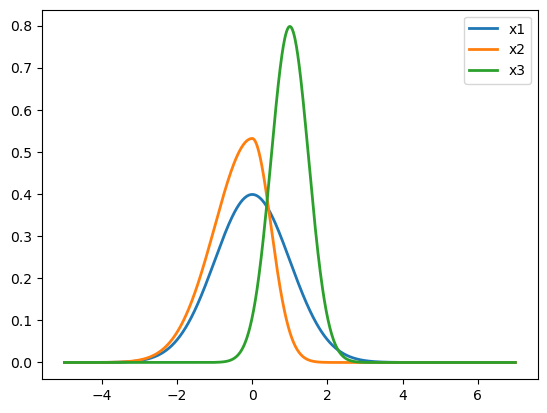

In [29]:
def sn(x, mu, var, tau):
    c = np.sqrt(2 / np.pi) * 1 / np.sqrt(var) * 1 / (1 + np.sqrt(tau))
    res = np.zeros_like(x)
    res[x <= mu] = c * np.exp(-((x[x <= mu] - mu) ** 2) / (2 * var))
    res[x > mu] = c * np.exp(-((x[x > mu] - mu) ** 2) / (2 * var * tau))
    return res

x1 = sn(t, mu = 0, var = 1, tau = 1)
x2 = sn(t, mu = 0, var = 1, tau = 0.25)
x3 = sn(t, mu = 1, var = 0.25, tau = 1)

plt.plot(t, x1, lw=2, label = 'x1')
plt.plot(t, x2, lw=2, label = 'x2')
plt.plot(t, x3, lw=2, label = 'x3')
plt.legend()


# Zadanie 7

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma,\tau)=\prod_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$

Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów Split Normal:

$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [22]:
def log_sn(x, mu, var, tau):
    return np.sum(np.log(sn(x, mu, var, tau)))

# Zadanie 8
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

In [23]:
##TO-DO

def unif_log_sn(x):
    mu, var, tau = x
    return -1 * log_sn(uniform_data, mu, var, tau)


# unif_log_sn(np.asarray((0, 1, 1)))
# unif_log_sn(np.asarray((0, 6, 10)))

x0 = np.asarray((0, 6, 10))
res3 = optimize.fmin_cg(unif_log_sn, x0)

C:\Users\rafal\AppData\Local\Temp\ipykernel_3740\3306917986.py:2: RuntimeWarning: invalid value encountered in sqrt
  c = np.sqrt(2 / np.pi) * 1 / np.sqrt(var) * 1 / (1 + np.sqrt(tau))
C:\Users\rafal\AppData\Local\Temp\ipykernel_3740\3306917986.py:4: RuntimeWarning: overflow encountered in exp
  res[x <= mu] = c * np.exp(-((x[x <= mu] - mu) ** 2) / (2 * var))


         Current function value: nan
         Iterations: 2
         Function evaluations: 464
         Gradient evaluations: 116


C:\Users\rafal\AppData\Local\Temp\ipykernel_3740\3306917986.py:2: RuntimeWarning: invalid value encountered in sqrt
  c = np.sqrt(2 / np.pi) * 1 / np.sqrt(var) * 1 / (1 + np.sqrt(tau))
C:\Users\rafal\AppData\Local\Temp\ipykernel_3740\3306917986.py:2: RuntimeWarning: invalid value encountered in sqrt
  c = np.sqrt(2 / np.pi) * 1 / np.sqrt(var) * 1 / (1 + np.sqrt(tau))


# Zadanie 9
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>california_housing.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [1]:
from sklearn import datasets
california_housing = datasets.fetch_california_housing()
data=california_housing.data[:,7]

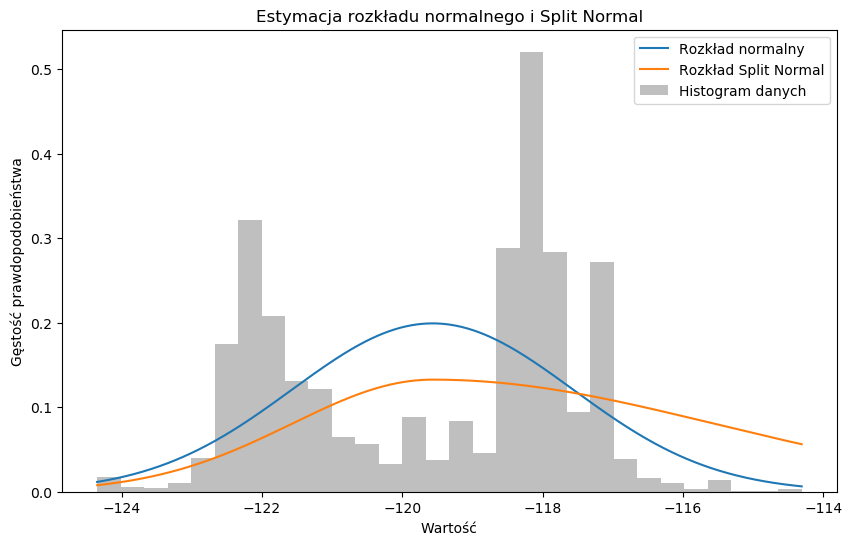

In [32]:
# Estymacja rozkładu normalnego
mu = np.mean(data)
sigma = np.std(data)
x = np.linspace(min(data), max(data), 1000)
pdf_normal = stats.norm.pdf(x, mu, sigma)

# Estymacja rozkładu Split Normal
tau = np.std(data)

pdf_split_normal = sn(x, mu, sigma ** 2, tau ** 2)

# Wykres
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_normal, label="Rozkład normalny")
plt.plot(x, pdf_split_normal, label="Rozkład Split Normal")
plt.hist(data, bins=30, density=True, alpha=0.5, color="gray", label="Histogram danych")
plt.xlabel("Wartość")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.title("Estymacja rozkładu normalnego i Split Normal")
plt.legend()
plt.show()